In [1]:
#import regions; regions.test()

import numpy as np
from astropy.table import Table, join, MaskedColumn, vstack
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import scipy
from astropy.time import Time
import pandas as pd
import re
import seaborn as sns
import datetime
from datetime import datetime
from datetime import timedelta
from math import e
from math import pi
from astropy.table import Column
from math import sqrt

In [2]:
#Data

In [3]:
data_table=Table.read('week7_data.fits')
data_table

SPEC_FILE,RA,DEC,F336W,F475W,V,VERR,R_GC
bytes31,float64,float64,float32,float32,float64,float64,float64
spec1d.mct6C.025.MS128721.fits,11.08988828927155,41.2739873805398,20.513336,22.147053,-14.064029874089584,9.959659577594929,15.23220787383256
spec1d.mct6C.064.MS179275.fits,11.131922519012118,41.32219921421166,19.017336,20.615053,34.331796080432284,8.00131908655348,15.102481308431773
spec1d.mct6C.072.MS185530.fits,11.157240720416313,41.32800001218763,19.421335,20.735054,-36.16247936920573,10.892241848582145,15.859047876365862
spec1d.mct6C.140.MS246706.fits,11.179836199115739,41.38028056276406,18.914335,19.715054,10.06474663988536,7.360077577583547,14.902349913073461
spec1d.mct6C.149.MS257904.fits,11.202548586767286,41.38723038346176,20.395336,21.886053,-28.40894878095989,8.15248034971978,15.522898208551595
spec1d.mct6C.224.MS476979.fits,11.292325658580005,41.48103447881055,20.276335,20.799053,109.31617345601782,22.664850082300145,15.802052057599267
spec1d.mct6D.105.MS470152.fits,11.168030861823686,41.47753296925145,20.152336,21.234053,-35.61817881619524,17.22781256604442,11.358182285252242
spec1d.mct6E.089.MS132927.fits,11.045680331348484,41.278266478572746,18.962336,20.441053,-34.070453536854814,13.008994381094187,13.394444927820908
spec1d.mct6E.139.MS198154.fits,11.03790679299546,41.33956895706313,19.291336,19.929054,39.7163729237406,16.598701339632587,10.932170428774386


In [4]:
#Anils Code

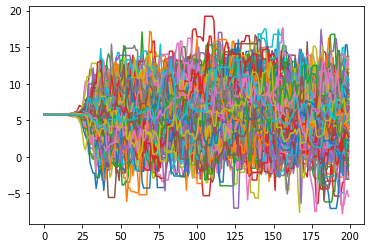

/Users/Tobin/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:50: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


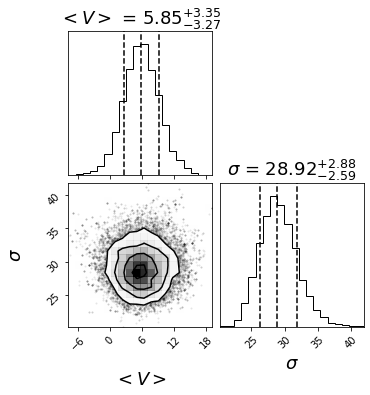

In [8]:
import numpy as np
import emcee
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy.table import Table
import math
import corner

data=fits.getdata('week7_data.fits')
t=Table(data)
v=np.array(t["V"])
verr=np.array(t["VERR"])

def lnlike(theta, v, verr):
    mu, sigma = theta
    return -0.5*(np.sum((v-mu)**2/(sigma**2+verr**2) + np.log(2*math.pi*(sigma**2+verr**2))))
2
import scipy.optimize as op
nll = lambda *args: -lnlike(*args)
result = op.minimize(nll, [0, 30], args=(t["V"], t["VERR"]))
mu_ml, sigma_ml = result["x"]

def lnprior(theta):
    mu, sigma = theta
    if -10 < mu < 20 and 0.01 < sigma < 50.0:
#        return np.log(1/sigma)
        return 0.0
    return -np.inf
    
def lnprob(theta, v, verr):
    lp = lnprior(theta)
    if not np.isfinite(lp):
        return -np.inf
    return lp + lnlike(theta, v, verr)

ndim, nwalkers = 2, 200
pos = [result["x"] + 1e-4*np.random.randn(ndim) for i in range(nwalkers)]

sampler = emcee.EnsembleSampler(nwalkers, ndim, lnprob, args=(t["V"], t["VERR"]))
sampler.run_mcmc(pos, 200) 

#plot chain
plt.plot(np.transpose(sampler.chain[:,:,0]))
plt.show()
sampler.chain
samples = sampler.chain[:, 50:, :].reshape((-1, ndim))
fig = corner.corner(samples, labels=["$<V>$", "$\sigma$"], label_kwargs={"fontsize": 18},
                                     quantiles=[0.16, 0.5, 0.84], show_titles=True, title_kwargs={"fontsize": 18})

fig.show()
